# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [50]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

In [51]:
news_api ='6c0d1dcc3fe44cb5a589ec3ee1a5ab0d'

In [55]:
# Read your api key environment variable
API = news_api

In [56]:
# Create a newsapi client
newsapi = NewsApiClient (api_key=API)

In [57]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything (
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)




In [58]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


In [59]:
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

btc_df = create_df(btc_headlines["articles"], "en")

eth_df = create_df(eth_headlines["articles"], "en")

In [71]:
# Create the Bitcoin sentiment scores DataFrame
for article in btc_headlines["articles"]:
    btc_sentiments = []
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu          
        })
        
    except AttributeError:
        pass

In [77]:
btc_sentiments = pd.DataFrame(generate_sentiments(btc_headlines["articles"]))


    
cols = ['Compound','Negative','Neutral','Positive','Text']
btc_sentiments = btc_sentiments[cols]

btc_sentiments.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.7096,0.169,0.831,0.000,Netflix\r\n is making a docuseries about one o...
1,0.7351,0.000,0.853,0.147,"Even in cyberspace, the Department of Justice ..."
2,-0.3400,0.118,0.825,0.057,The couple would never flee from the country a...
3,0.7783,0.000,0.837,0.163,"If Sundays Super Bowl ads are any indication, ..."
4,0.5859,0.000,0.876,0.124,The news of one of the biggest money launderin...


In [78]:
def generate_sentiments(articles):
    sentiments=[]
    for article in articles:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Text": text,
                "Date": date,
                "Compound": compound,
                "Positive": pos,
                "Negative": neg,
                "Neutral": neu
            })
        except AttributeError:
            pass
    return sentiments

In [79]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = pd.DataFrame(generate_sentiments(eth_headlines["articles"]))


    
cols = ['Compound','Negative','Neutral','Positive','Text']
eth_sentiments = eth_sentiments[cols]

eth_sentiments.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.3182,0.093,0.848,0.059,"In February, shit hit the fan in the usual way..."
1,-0.2498,0.059,0.941,0.000,"Technical analysis isnt a perfect tool, but it..."
2,-0.1027,0.036,0.964,0.000,People in Colorado will be able to pay their s...
3,0.6705,0.000,0.812,0.188,Coinbase reported that the share of trading vo...
4,-0.4588,0.083,0.917,0.000,Illustration by James Bareham / The Verge\r\n\...


In [80]:
# Describe the Bitcoin Sentiment
btc_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.037761,0.058690,0.869430,0.071890
std,0.478179,0.071864,0.087003,0.071178
min,-0.895700,0.000000,0.627000,0.000000
25%,-0.318200,0.000000,0.821250,0.000000
50%,0.000000,0.034500,0.867500,0.058000
75%,0.451975,0.092250,0.938250,0.108500
max,0.910000,0.269000,1.000000,0.301000


In [81]:
# Describe the Ethereum Sentiment
eth_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.168050,0.041760,0.874520,0.083730
std,0.433072,0.063137,0.085184,0.070453
min,-0.913600,0.000000,0.627000,0.000000
25%,-0.012900,0.000000,0.832750,0.028500
50%,0.177900,0.000000,0.875000,0.072000
75%,0.510600,0.066250,0.941750,0.125000
max,0.918600,0.312000,1.000000,0.290000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [82]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/joey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    lemmatizer = WordNetLemmatizer()
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    sw = set(stopwords.words('english'))
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_addon = {'(',')',',','.','[',']',':',':'}
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return tokens

In [85]:
# Create a new tokens column for Bitcoin
btc_sentiments['Tokens']=[tokenizer(r) for r in btc_sentiments['Text']]
btc_sentiments

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.7096,0.169,0.831,0.000,Netflix\r\n is making a docuseries about one o...,"[netflix, making, docuseries, one, worst, rapp..."
1,0.7351,0.000,0.853,0.147,"Even in cyberspace, the Department of Justice ...","[even, cyberspace, department, justice, able, ..."
2,-0.3400,0.118,0.825,0.057,The couple would never flee from the country a...,"[couple, would, never, flee, country, risk, lo..."
3,0.7783,0.000,0.837,0.163,"If Sundays Super Bowl ads are any indication, ...","[sundays, super, bowl, ad, indication, crypto,..."
4,0.5859,0.000,0.876,0.124,The news of one of the biggest money launderin...,"[news, one, biggest, money, laundering, scheme..."
...,...,...,...,...,...,...
95,-0.4404,0.172,0.726,0.102,U.S. stock index futures cut some losses on Fr...,"[us, stock, index, future, cut, loss, friday, ..."
96,0.5574,0.067,0.747,0.186,"Dogecoin is now worth more than rubles, accord...","[dogecoin, worth, ruble, according, ukraines, ..."
97,-0.8271,0.185,0.815,0.000,The internet abounds in tales of overnight cry...,"[internet, abounds, tale, overnight, crypto, m..."
98,0.1027,0.000,0.952,0.048,Trucks participate in a blockade near the parl...,"[trucks, participate, blockade, near, parliame..."


In [86]:
# Create a new tokens column for Ethereum
eth_sentiments['Tokens']=[tokenizer(r) for r in eth_sentiments['Text']]
eth_sentiments

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.3182,0.093,0.848,0.059,"In February, shit hit the fan in the usual way...","[february, shit, hit, fan, usual, way, old, tw..."
1,-0.2498,0.059,0.941,0.000,"Technical analysis isnt a perfect tool, but it...","[technical, analysis, isnt, perfect, tool, may..."
2,-0.1027,0.036,0.964,0.000,People in Colorado will be able to pay their s...,"[people, colorado, able, pay, state, tax, cryp..."
3,0.6705,0.000,0.812,0.188,Coinbase reported that the share of trading vo...,"[coinbase, reported, share, trading, volume, e..."
4,-0.4588,0.083,0.917,0.000,Illustration by James Bareham / The Verge\r\n\...,"[illustration, james, bareham, verge, million,..."
...,...,...,...,...,...,...
95,0.4019,0.066,0.816,0.118,While a world of internet users skeptically gr...,"[world, internet, user, skeptically, grapple, ..."
96,0.0516,0.064,0.867,0.069,What happened \r\nThe value of major cryptocur...,"[happenedthe, value, major, cryptocurrencies, ..."
97,0.0000,0.000,1.000,0.000,Financial trading platform Robinhood is now lo...,"[financial, trading, platform, robinhood, look..."
98,0.3903,0.037,0.877,0.087,Many brands are starting to see a recovery des...,"[many, brand, starting, see, recovery, despite..."


In [87]:
btc_sentiments.keys()

Index(['Compound', 'Negative', 'Neutral', 'Positive', 'Text', 'Tokens'], dtype='object')

In [88]:
eth_sentiments.keys()

Index(['Compound', 'Negative', 'Neutral', 'Positive', 'Text', 'Tokens'], dtype='object')

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [89]:
from collections import Counter
from nltk import ngrams
import nltk, re, string, collections

In [90]:
# Generate the Bitcoin N-grams where N=2
all_btc_tokens = []
for x in range(0,len(btc_sentiments)):
    for y in btc_sentiments['Tokens'][x]:
        all_btc_tokens.append(y)



bigram_btc_counts = Counter(ngrams(all_btc_tokens, n=2))
bigram_btc_counts.most_common(10)

[(('feb', 'reuters'), 15),
 (('march', 'reuters'), 8),
 (('char', 'feb'), 7),
 (('char', 'new'), 6),
 (('new', 'york'), 6),
 (('char', 'london'), 5),
 (('since', 'russia'), 4),
 (('char', 'bitcoin'), 4),
 (('london', 'feb'), 4),
 (('super', 'bowl'), 3)]

In [91]:
# Generate the Ethereum N-grams where N=2
all_eth_tokens = []
for x in range(0,len(eth_sentiments)):
    for y in eth_sentiments['Tokens'][x]:
        all_eth_tokens.append(y)
        
bigram_counts_eth = Counter(ngrams(all_eth_tokens, n=2))
bigram_counts_eth.most_common(10)

[(('cb', 'insights'), 6),
 (('insights', 'newsletter'), 6),
 (('newsletter', 'subscriber'), 6),
 (('subscriber', 'get'), 6),
 (('get', 'free'), 6),
 (('free', 'newsletter'), 6),
 (('newsletter', 'stay'), 6),
 (('stay', 'step'), 6),
 (('step', 'ahead'), 6),
 (('ahead', 'technology'), 6)]

In [92]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [93]:
# Use token_count to get the top 10 words for Bitcoin
token_count(all_btc_tokens)

[('char', 100), ('bitcoin', 37), ('reuters', 26)]

In [94]:
# Use token_count to get the top 10 words for Ethereum
token_count(all_eth_tokens)

[('char', 94), ('ha', 23), ('cryptocurrency', 17)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

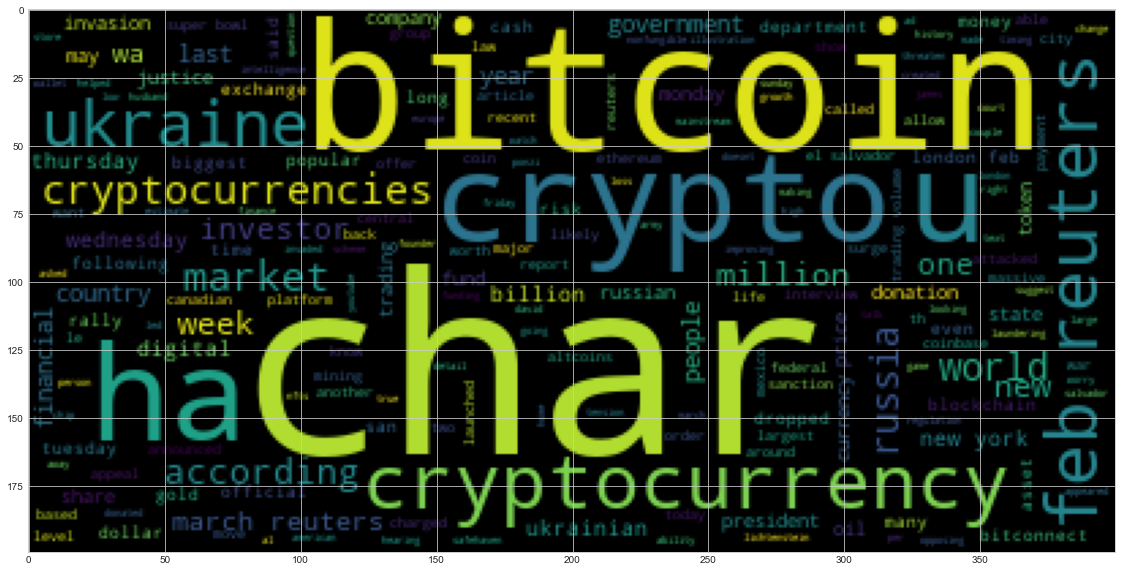

In [96]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(' '.join(all_btc_tokens))
plt.imshow(wc_btc)

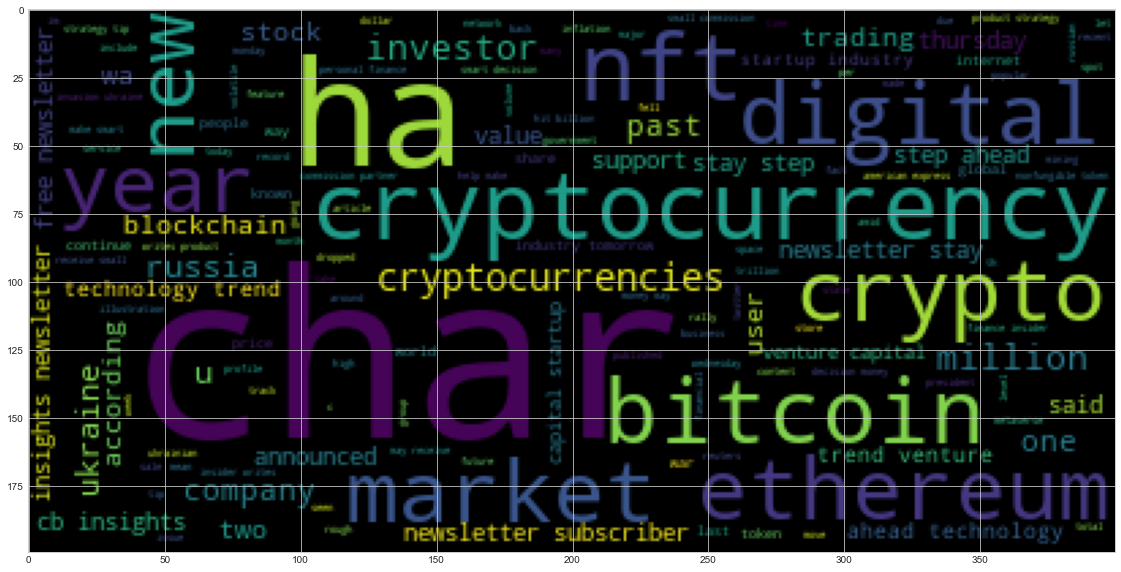

In [97]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(' '.join(all_eth_tokens))
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [99]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm


     |████████████████████████████████| 13.9 MB 14 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [100]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_big_string = ' '.join(btc_sentiments['Text'])
regex = re.compile("[^a-zA-Z ]")
re_clean = regex.sub('', btc_big_string)
input_words_btc = (re_clean)

In [28]:
# Run the NER processor on all of the text
doc_btc = displacy.render(nlp(str(input_words_btc)), jupyter=True, style='ent')
doc = nlp(input_words_btc)


In [30]:
# List all Entities
for ent in doc.ents:
    print( ent, ent.label_,)

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---